In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import yellowbrick as yb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification

from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report

In [57]:
#Read the dataset
data=pd.read_csv('covid_database.csv')

In [58]:
data.groupby('Persistent_symptoms').count()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore_throat,Chest_pain,Headache,Diarrhea,...,Heart_disease,Cancer,Kidney_problems,Fear_of_reinfection,Hozpitalization,Self_medication,Depression,Sputum_production,Lack_of_appetite,Fatigue
Persistent_symptoms,,,,,,,,,,,,,,,,,,,,,
0,802,802,802,802,802,802,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
1,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [59]:
#Divide the dataset into independent and dependent variables
X = data.drop(["Persistent_symptoms"], axis=1)
y = data['Persistent_symptoms']

#y = y.values.ravel()
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) 

#Data was splitted as 80% train data and 20% test data.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
#y_train = y_train.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (801, 27)
X_test shape: (201, 27)
y_train shape: (801,)
y_test shape: (201,)


In [60]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LogisticRegression

In [61]:
reg = LogisticRegression(random_state = 42)
reg_pred = reg.fit(X_train,y_train).predict(X_test)

KNeighborsClassifier

In [62]:
#KNN
knn = KNeighborsClassifier()
knn_pred = knn.fit(X_train,y_train).predict(X_test)

SVC

In [63]:
svc = SVC(random_state = 42)
svc_pred = svc.fit(X_train,y_train).predict(X_test)

Decision Tree Classifier

In [64]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc_pred = dtc.fit(X_train,y_train).predict(X_test)

RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(random_state = 42)
rfc_pred = rfc.fit(X_train,y_train).predict(X_test)

GaussianNB

In [66]:
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

AdaBoost

In [67]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
abc_pred = abc.fit(X_train, y_train).predict(X_test)

Gradient Boosting Classification

In [68]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster_pred = gradient_booster.fit(X_train, y_train).predict(X_test)

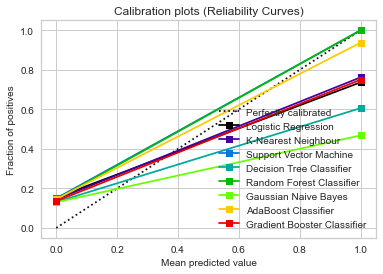

In [69]:
probas_list = [reg_pred, knn_pred, svc_pred, dtc_pred, rfc_pred, gnb_pred, abc_pred, gradient_booster_pred]

clf_names = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'AdaBoost Classifier', 'Gradient Booster Classifier']

skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names)

plt.show()